<a href="https://colab.research.google.com/github/wa-le/SpamEmail-Detection-LogRegression/blob/master/ZTM_BA_LogisticReg.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Libraries, Directories and Data

In [71]:
# libraries
import statsmodels.api as sm 
import matplotlib.pyplot as plt 
import numpy as np
import pandas as pd
import seaborn as sns

In [45]:
# Set Working Dir
%cd /content/drive/MyDrive/Business Analyst course/Statistics and Descriptive Analytics/Logistic Regression

/content/drive/MyDrive/Business Analyst course/Statistics and Descriptive Analytics/Logistic Regression


In [46]:
# Load Data
df = pd.read_csv("spam.csv")
df

,crl.tot,dollar,bang,money,n000,make,yesno
0,278,0.000,0.778,0.00,0.00,0.00,y
1,1028,0.180,0.372,0.43,0.43,0.21,y
2,2259,0.184,0.276,0.06,1.16,0.06,y
3,191,0.000,0.137,0.00,0.00,0.00,y
4,191,0.000,0.135,0.00,0.00,0.00,y
...,...,...,...,...,...,...,...
4596,88,0.000,0.000,0.00,0.00,0.31,n
4597,14,0.000,0.353,0.00,0.00,0.00,n
4598,118,0.000,0.000,0.00,0.00,0.30,n
4599,78,0.000,0.000,0.00,0.00,0.96,n


In [47]:
df[df["bang"] > 5].count()

crl.tot    22
dollar     22
bang       22
money      22
n000       22
make       22
yesno      22
dtype: int64

In [48]:
df.isnull().sum()

crl.tot    0
dollar     0
bang       0
money      0
n000       0
make       0
yesno      0
dtype: int64

#Data Analysis

In [49]:
# summary statistics
df.describe()

,crl.tot,dollar,bang,money,n000,make
count,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000
mean,283.289285,0.075811,0.269071,0.094269,0.101645,0.104553
std,606.347851,0.245882,0.815672,0.442636,0.350286,0.305358
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,35.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,95.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,266.000000,0.052000,0.315000,0.000000,0.000000,0.000000
max,15841.000000,6.003000,32.478000,12.500000,5.450000,4.540000


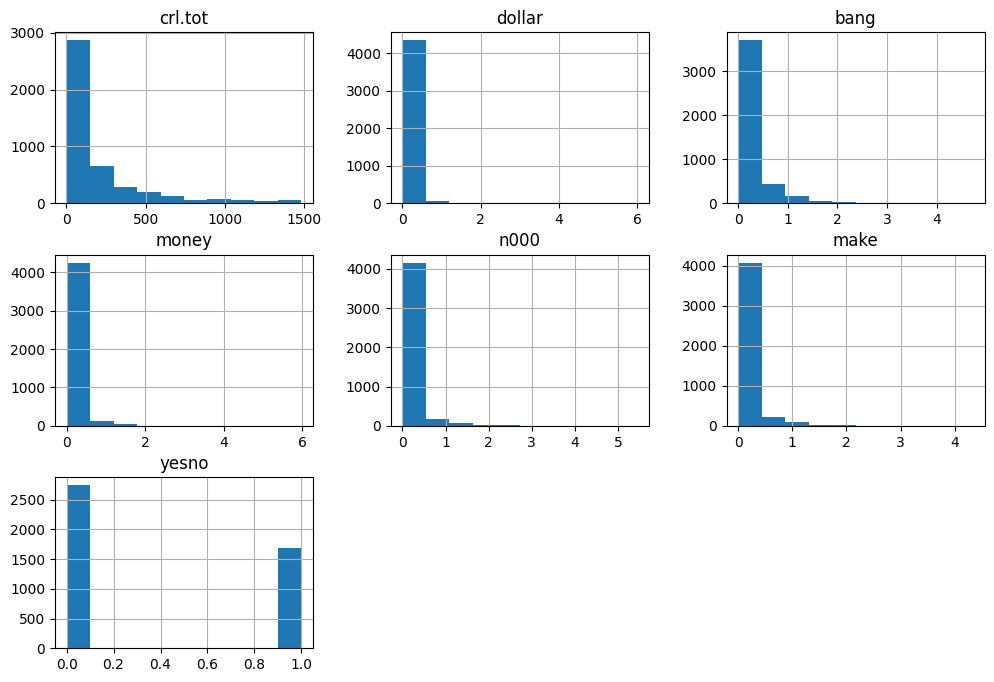

In [72]:
df.hist(figsize=(12, 8));

In [51]:
# from the histogram above, we see that we have a lot of outliers
# remove outliers
print(len(df))
df = df[df["crl.tot"] < 1500]
print(len(df))
df = df[df["bang"] < 5]
print(len(df))
df = df[df["money"] < 6]
print(len(df))

4601
4462
4439
4432


<ipython-input-52-660d6f94d9cf>:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),


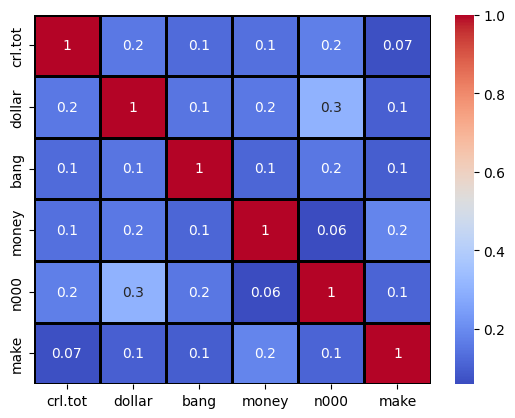

In [52]:
# we are still looking for correlations to remove
# checking for ones that add value or not

sns.heatmap(df.corr(),
            annot = True,
            fmt = '.1g',
            cmap = 'coolwarm',
            linewidth = 1,
            linecolor = 'black'); 

#Logistic Regression Prep

In [54]:
df.head()

,crl.tot,dollar,bang,money,n000,make,yesno
0,278,0.00,0.778,0.00,0.00,0.00,y
1,1028,0.18,0.372,0.43,0.43,0.21,y
3,191,0.00,0.137,0.00,0.00,0.00,y
4,191,0.00,0.135,0.00,0.00,0.00,y
5,54,0.00,0.000,0.00,0.00,0.00,y


In [55]:
# Prepare DV
df["yesno"] = np.where(df["yesno"] == "y", 1, 0)
df

,crl.tot,dollar,bang,money,n000,make,yesno
0,278,0.00,0.778,0.00,0.00,0.00,1
1,1028,0.18,0.372,0.43,0.43,0.21,1
3,191,0.00,0.137,0.00,0.00,0.00,1
4,191,0.00,0.135,0.00,0.00,0.00,1
5,54,0.00,0.000,0.00,0.00,0.00,1
...,...,...,...,...,...,...,...
4596,88,0.00,0.000,0.00,0.00,0.31,0
4597,14,0.00,0.353,0.00,0.00,0.00,0
4598,118,0.00,0.000,0.00,0.00,0.30,0
4599,78,0.00,0.000,0.00,0.00,0.96,0


In [74]:
#prepare X and y
# add constant to X
y = df["yesno"]
X = df.iloc[:, :-1]
X = sm.add_constant(X)
X.head(2)

,const,crl.tot,dollar,bang,money,n000,make
0,1.0,278,0.00,0.778,0.00,0.00,0.00
1,1.0,1028,0.18,0.372,0.43,0.43,0.21


In [73]:
# create training and test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size = 0.2,
                                                    random_state = 1502)

#Logistic Regression

In [58]:
#Logistic regression

model = sm.Logit(y_train, X_train).fit()
print(model.summary())

Optimization terminated successfully.
         Current function value: 0.386779
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:                  yesno   No. Observations:                 3545
Model:                          Logit   Df Residuals:                     3538
Method:                           MLE   Df Model:                            6
Date:                Mon, 12 Jun 2023   Pseudo R-squ.:                  0.4210
Time:                        23:06:11   Log-Likelihood:                -1371.1
converged:                       True   LL-Null:                       -2368.2
Covariance Type:            nonrobust   LLR p-value:                     0.000
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -2.1801      0.074    -29.532      0.000      -2.325      -2.035
crl.tot        0.0017      0.

In [59]:
# Read Coefficient
# create func
# apply the func
def logistic_reader(coefficient):
  probability = round((np.exp(coefficient) -1) * 100, 2)

  if probability > 0:
    print(f"The likelihood increases by {probability}%")
  elif probability ==0:
    print("No impact")
  else:
    print(f"The likelihood decreases by, {probability}%")

In [60]:
logistic_reader(-1.2)

The likelihood decreases by, -69.88%


#Assess The Model

In [61]:
#Predictions
predictions = model.predict(X_test)
# but we cannot compare our X_test to y_test because X_test is in binary
predictions = np.where(predictions > 0.5, 1, 0)
predictions[:5]

array([1, 0, 0, 0, 0])

In [62]:
# compare predictions to actuals, but non of our KPIs we've learnt
# actually work for us

#Confusion Matrix

##### Goal is to access the results of a classifier

In [63]:
# check if dataset is balanced
y_test.mean()
#seems somewhat balanced

0.35400225479143177

In [64]:
# Confusion Matrix
from sklearn.metrics import confusion_matrix

print(confusion_matrix(y_test, predictions))
tn, fp, fn, tp = confusion_matrix(y_test, predictions).ravel()

[[524  49]
 [102 212]]


In [65]:
print("True Negative", '=', tn)
print("False Positive", '=', fp)
print("False Negative", '=', fn)
print("True Positive", '=', tp)

True Negative = 524
False Positive = 49
False Negative = 102
True Positive = 212


In [66]:
# Accuracy
accuracy = (tp + tn) / (tp + tn + fp +fn)
print("Accuracy:", round(accuracy * 100, 1), "%")

Accuracy: 83.0 %


In [67]:
# F1_score
f1 = 2 * tp / (2 * tp + fn + fp)
print("F1 Score:", round(f1 *100, 1), "%")

F1 Score: 73.7 %


In [68]:
# Specificity
specificity = tn / (tn + fp)
print("Specificity:", round(specificity *100, 1), "%")

Specificity: 91.4 %


In [69]:
# Sensitivity
sensitivity = tp / (tp + fn)
print("Sensitivity:", round(sensitivity *100, 1), "%")

sensitivity: 67.5 %


In [70]:
# Classification Report
from sklearn.metrics import classification_report
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.84      0.91      0.87       573
           1       0.81      0.68      0.74       314

    accuracy                           0.83       887
   macro avg       0.82      0.79      0.81       887
weighted avg       0.83      0.83      0.83       887

